# Определение пола автора по сообщению.
Выполнил: Татаренко Михаил, группа 306


In [14]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import time
import numpy as np

Цель работы состоит в определении пола автора сообщения по сообщению, написанном на естественном языке.
План работы:
    1. Составить файл с пользователями, для которых известен пол.
    2. Чистка сообщений пользователей от ненужной информации.
    3. Лексикографическая сортировка датасета.
    4. Конкатенация сообщений одного автора.
    5. Обучение классфикатора, вывод score
    6. Сравнение разных подходов

Для начала определеим нужные нам функции:

In [4]:
def startTimer():
    print("start")
    start = time.time()
    
    return start

def endTimer(start):
    end = time.time()
    print("Time in minutes: ", (end - start) / 60)
    print("end")
    
def run(classifier, X, y):
    start = startTimer()

    scores = cross_val_score(classifier, X, y, cv=3, n_jobs=-1)

    print('Scores %s' % scores)
    print('Mean scores: %2f' %scores.mean())

    end = endTimer(start)

In [15]:
from matplotlib import pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [5]:
import json

def process_data(file_name, number_of_rows):
    rows_list = list()
    
    number= 0 
    for line in open(file_name, 'r', encoding='utf-8'):
        data = json.loads(line)
        rows_list.append(data)
        number +=1
        if number == number_of_rows:
            break
    
    return rows_list
    

Вывод первых 10 строк файла messages.jsonlines

In [9]:
number = 10
for line in open('messages.jsonlines', 'r', encoding='utf-8'):
    print(line)
    number -= 1
    if (number == 0):
        break

{"text": "[Волейболь], не, мне лень и тебе наверно тоже", "author": 6702230679382370046}

{"text": "я ваще тиктоки снимаю ебните меня пж", "author": 6702230679382370046}

{"text": "[Лариса], екарный бабай.......", "author": 4316553474255117951}

{"text": "Берейік*", "author": 6140011286109608067}

{"text": "Еще как уничтожаем :D", "author": 6973438300190022994}

{"text": "Да не особо, спать хотим :з", "author": 2563610028761929896}

{"text": "Это стоило ожиданий :3", "author": 6973438300190022994}

{"text": "Просто ваау", "author": 3307351359150187073}

{"text": "Как же круто", "author": 3416365457596350211}

{"text": "Ключ?", "author": 6705271266534766671}



Вывод первых 10 строк файла public.jsonlines

In [13]:
number = 10
for line in open('public.jsonlines', 'r', encoding='utf-8'):
    print(line)
    number -= 1
    if (number == 0):
        break

{"author": 2298419188639097585, "gender": "male"}

{"author": 8171608141356010324, "gender": "female"}

{"author": 2239623515650098771, "gender": "male"}

{"author": 6559014502293239281, "gender": "male"}

{"author": 3603677470220995862, "gender": "female"}

{"author": 5617921399614647264, "gender": "female"}

{"author": 1428712895612072865, "gender": "female"}

{"author": 3090286998669764786, "gender": "male"}

{"author": 5849027016346098950, "gender": "male"}

{"author": 638629422429114713, "gender": "male"}



Из файлов messages.jsonlines.txt и public.jsonlines.txt составляем файл gender_messages.jsonlines.txt, в котором содержатся пользователи с известным полом.

In [15]:
import json
import time

id_gender_dict = dict()

def process_data_users(line):
    data = json.loads(line)
    id_gender_dict[data['author']] = data['gender']

def process_data_messages(line, output):
    data = json.loads(line)
    gender = id_gender_dict.get(data['author'], None)
    if (gender != None):
        data['gender'] = gender
        data.update(data)
        json.dump({"author" : data['author'], "text" : data['text'], "gender" : data["gender"]}, output, ensure_ascii=False)
        output.write('\n')

print("Start")
start = time.time()
        
for line in open('public.jsonlines',  encoding='utf-8'):
    process_data_users(line)
    
with open('gender_messages.jsonlines', 'w',  encoding='utf-8') as output:
    for line in open('messages.jsonlines', 'r', encoding='utf-8'):
        process_data_messages(line, output)

end = time.time()
print("Time in minutes: ", (end - start) / 60)
print("Number of lines: ", number)
print("End")

Start
Time in minutes:  13.192520987987518
Number of lines:  0
End


Вывод первых 10 строк получившегося файла: gender_messages.jsonlines.txt

In [18]:
number = 10
for line in open('gender_messages.jsonlines', 'r', encoding='utf-8'):
    print(line)
    number -= 1
    if (number == 0):
        break

{"author": 4316553474255117951, "text": "[Лариса], екарный бабай.......", "gender": "female"}

{"author": 6140011286109608067, "text": "Берейік*", "gender": "female"}

{"author": 6973438300190022994, "text": "Еще как уничтожаем :D", "gender": "female"}

{"author": 6973438300190022994, "text": "Это стоило ожиданий :3", "gender": "female"}

{"author": 3416365457596350211, "text": "Как же круто", "gender": "female"}

{"author": 5608318040041581784, "text": "[Сергей], не подходит, менялся замок", "gender": "male"}

{"author": 5608318040041581784, "text": "[Сергей], лансер 9", "gender": "male"}

{"author": 8308774534622922643, "text": "На Бмв такой же случай был как у вас , привезли доп.аккум, разобрали подсветку номера , сняли лампочку , плюс минус куда лампочка вставляется и вуаля", "gender": "male"}

{"author": 8308774534622922643, "text": "Но может у вас и не прокатит ", "gender": "male"}

{"author": 2779091484097155185, "text": "У меня есть 1000просмотров но нет 500 подпишеков", "gende

В файле gender_messages.jsonlines.txt специально изменён порядок ключей, чтобы в дальнейшем можно было бы выполнить сортировку в лексикографическом порядке. 

Однако сначала необходимо почистить сообщения от:
1. [user_name]
2. e-mail
3. hastags
4. Знаки пунктуации.
5. Стоп слова (русский язык).
6. Цифры

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mich4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
import json
import time
import re
import nltk
import string

from nltk.corpus import stopwords

stop_rus = stopwords.words('russian')

pattern_site = re.compile(r'^https?:\/\/.*[\r\n]*')
pattern_hashtag = re.compile(r'#(\w+)')
pattern_name = re.compile(r'\[[^)]*\]')

def process_data_messages(line, output):
    data = json.loads(line)   
    message = data["text"]
    
    message = re.sub(pattern_name, '', message) # 1. Удаление [user_name]
    message = [
        re.sub(pattern_site, '', word) and      # 2. Удаление e-mail
        re.sub(pattern_hashtag, '', word)       # 3. Удаление hastags
        for word in message.split()
    ]    
    
    message = list(filter(None, message))
    message = " ".join(message)
    
    for punct in string.punctuation:  # 4. Удаление знаков пункуации
        if punct in message:
            message = message.replace(punct, " ")
    
    tokenizeMessage = list()
    for word in message.split():
        if word not in stop_rus and not(word.isdigit()): # 5. 6. Удаление цифр и стоп-слов
            tokenizeMessage.append(word)
    
    if len(tokenizeMessage) > 0: # Избавляемся от пустых сообщений
        tokenizeMessage = " ".join(tokenizeMessage)
        # print(tokenizeMessage)
        data['text'] = tokenizeMessage
        data.update(data)
        json.dump({"author" : data['author'], "text" : data['text'], "gender" : data["gender"]}, output, ensure_ascii=False)
        output.write('\n')
        

print("start")
start = time.time()

# number = 0
with open('clean_gender_messages.jsonlines', 'w',  encoding='utf-8') as output:
    for line in open('gender_messages.jsonlines', 'r', encoding='utf-8'):
        process_data_messages(line, output)
    # number += 1
    # if (number == 1000):
      #  break
            
end = time.time()
print("Time in minutes: ", (end - start) / 60)
print("end")

start
Time in minutes:  38.090881049633026
end


Выполняем лексикографическую сортировку с помощью консольной команды:

```sort -V clean_gender_messages.jsonlines > sorted_clean_gender_messages.jsonlines```

Выполняем конкатенацию сообщений для одного автора. Это нужно, чтобы увеличить вектор признаков. Опытным путём было также установлено, что конкатенация сообщений одного автора дает больший score

In [119]:
import json
import time

cache_data = dict()

print("start")
start = time.time()

with open('concat_sorted_clean_gender_messages.jsonlines', 'w',  encoding='utf-8') as output:
    with open('sorted_clean_gender_messages.jsonlines', 'r', encoding='utf-8') as inputFile:
        cache_data = json.loads(inputFile.readline())
        for line in inputFile:
            data = json.loads(line)
            if (cache_data["author"] == data["author"]):
                cache_data["text"] += (" " + data["text"])
            else:
                json.dump({"text" : cache_data["text"], "gender" : cache_data["gender"]}, output, ensure_ascii=False)
                output.write('\n')
                cache_data = data
        

end = time.time()
print("Time in minutes: ", (end - start) / 60)
print("end")

start
Time in minutes:  3.4715959151585896
end


In [22]:
import pandas as pd


rows_list = process_data('concat_sorted_clean_gender_messages.jsonlines', 3000)          
df = pd.DataFrame(rows_list)

Для извлечния набора признаков используется TfidfVectorizer. 
tf–idf - это сокращение от term frequency–inverse document frequency.
tf — отношение числа вхождений некоторого слова к общему числу слов документа.
idf — инверсия частоты, с которой некоторое слово встречается в документах коллекции. 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer()
X_Tfid = vectorizer.fit_transform(df['text'])

le = LabelEncoder()
y = le.fit_transform(df['gender'])

В качестве классификатора используется наивный байесовский классифифкатор - вероятностный классификатор основанный на применении теоремы Байеса. 

Также использовалась логистическая регрессия — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём подгонки данных к логистической кривой.

Логистическая кривая имеет вид:

$f(x) = \frac{1}{1 + e^{-x}}$

Для начала построим кривые обучения на небольщом датасете, чтобы посмотреть, как показывают себя модели и есть ли смысл увеличивать количество данных.

<module 'matplotlib.pyplot' from 'C:\\Users\\Mich4\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

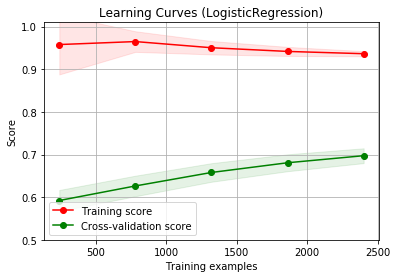

In [72]:
title = "Learning Curves (LogisticRegression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_Tfid, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

По данному графику видно, что увеличение размера датасета должно положительно сказаться на точности предсказаний.

<module 'matplotlib.pyplot' from 'C:\\Users\\Mich4\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

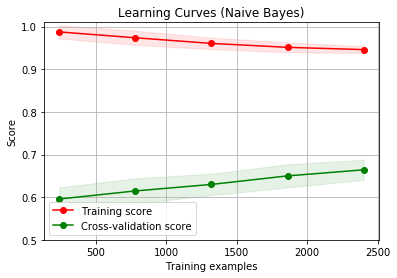

In [24]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MultinomialNB()
plot_learning_curve(estimator, title, X_Tfid, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

По данному графику видно, что увеличение размера датасета должно положительно сказаться на точности предсказаний.

Посмотрим какие предсказание получаются на большем датасете:

In [25]:
rows_list = process_data('concat_sorted_clean_gender_messages.jsonlines', 2000000)          
df = pd.DataFrame(rows_list)

X = df['text']
y = df['gender']

In [26]:
vectorizer = TfidfVectorizer()
X_Tfid = vectorizer.fit_transform(X)

In [27]:
run(LogisticRegression(), X_Tfid, y)

start
Scores [0.85137707 0.85085957 0.85029535]
Mean scores: 0.850844
Time in minutes:  3.187295202414195
end


In [28]:
run(MultinomialNB(), X_Tfid, y)

start
Scores [0.82098409 0.81994159 0.81988732]
Mean scores: 0.820271
Time in minutes:  0.3903646151224772
end


Теперь рассмотрим другой метод извлечения признаков - N-граммы. N-грамма — это последовательность из n элементов. 
Это может быть последовательность звуков, слогов, слов или букв, что позволяет использовать их для моей задачи.

Применим N-граммы на небольшой выборке и посмотрим, как поведут себя графики:

In [8]:
rows_list = process_data('concat_sorted_clean_gender_messages.jsonlines', 1000)          
df = pd.DataFrame(rows_list)

X = df['text']
y = df['gender']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df = 0.4, ngram_range=(1, 2)) 
X_CountVect = vectorizer.fit_transform(X)

<module 'matplotlib.pyplot' from 'C:\\Users\\Mich4\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

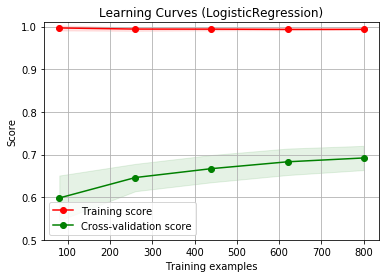

In [16]:
title = "Learning Curves (LogisticRegression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_CountVect, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

По данному графику видно, что увеличение размера датасета должно положительно сказаться на точности предсказаний.

<module 'matplotlib.pyplot' from 'C:\\Users\\Mich4\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

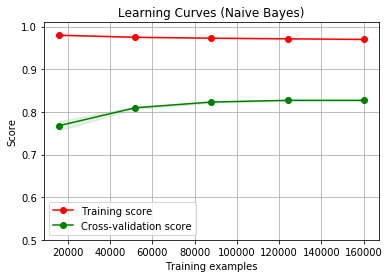

In [115]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MultinomialNB()
plot_learning_curve(estimator, title, X_CountVect, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

По данному графику видно, что увеличение размера датасета должно положительно сказаться на точности предсказаний.

Посмотрим какие предсказание получаются на большем датасете:

In [17]:
rows_list = process_data('concat_sorted_clean_gender_messages.jsonlines', 200000)          
df = pd.DataFrame(rows_list)

X = df['text']
y = df['gender']

In [18]:
vectorizer = CountVectorizer(max_df = 0.4, ngram_range=(1, 2)) 
X_CountVect = vectorizer.fit_transform(X)

In [19]:
run(LogisticRegression(), X_CountVect, y)

start
Scores [0.80377098 0.80915595 0.81947319]
Mean scores: 0.810800
Time in minutes:  10.501063080628713
end


In [20]:
run(MultinomialNB(), X_CountVect, y)

start
Scores [0.82783086 0.82826586 0.82592326]
Mean scores: 0.827340
Time in minutes:  0.07364148696263631
end


#### Выводы

Результаты тестов говорят о том, что лучше всего для решения данной задачи подходит логистическая регрессия с использовванием tf-idf (0.85).

Однако стоит отметить, что на втором месте оказался наивный байесовский классификатор с использованием биграм или tf-idf (0.82 - 0.83).
К тому же работает он значительно быстрее. Это может сделать его более предпочтительным вариантом для решения такого рода задач, так как, основываясь на показания графиков, можно утверждать, что увеличение количества данных в любом случае приведет к увеличению точности предсказаний.

Тем интереснее тот факт, что в основе данного классификатора лежит простая теорема теорема Байеса:
$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$